In [4]:
#Importing neccesary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

In [5]:
#loading dataset

data=pd.read_csv("full.csv")

In [6]:
data.head()

,Radius,Texture,Smoothness,Compactness,Concavity,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Smoothness_SE,...,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Smoothness,W_Compactness,W_Concavity,W_Symmetry,W_fractal_dimension,Diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,1


In [7]:
#Separate features and target variables
Y=data["Diagnosis"]
Y=Y.to_numpy()

In [8]:
print(Y.shape)

(569,)


In [9]:
Y=Y.reshape(Y.shape[0],1)


In [10]:
print(Y.shape)

(569, 1)


In [11]:
X=data.loc[:, data.columns != 'Diagnosis']


In [12]:
X.head()

,Radius,Texture,Smoothness,Compactness,Concavity,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Smoothness,W_Compactness,W_Concavity,W_Symmetry,W_fractal_dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [13]:
X=X.to_numpy()


In [14]:
print(X.shape)

(569, 20)


In [15]:
#Split train and test dataset
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X_train.shape,X_test.shape,sep='\n')

(455, 20)
(114, 20)


In [17]:
#Change Shape for easy calculation
X_train_un=X_train.T
Y_train=Y_train.T
print(X_train.shape,Y_train.shape)

(455, 20) (1, 455)


In [18]:
#Initialise weights
def weight_init(X):
    weights=np.zeros((X.shape[0],1))
    const=0
    return weights,const

In [19]:
#Calculate Hypothesis
def hypothesis(X,W,c):
    Z=np.dot(W.T,X)+c
    y_hat=1/(1+np.exp(-Z))
    
    return y_hat

In [20]:
#Calculate Cost 
def Cost(y,y_hat):
    m=y.shape[1] #number of examples
    J=(-1/m)*np.sum((y*np.log(y_hat))+((1-y)*(np.log(1-y_hat))))
    return J

In [21]:
#Calculate Gradients
def gradient_descent(w,c,x,y,y_hat,alpha):
    m=y.shape[1]
    
    
    dW=(1/m)*(np.dot(x,(y_hat-y).T))
    dc=(1/m)*np.sum((y_hat-y).T)
   
    w-=alpha*(dW)
    c-=alpha*(dc)
    


In [22]:
#Assemble Logistic Model
def log_model_fit(X,Y,iterations,alpha,verbose=1):
    w,c=weight_init(X) #initialising weights
    costs=[] #list of costs to help plot graph later
    for i in range(iterations):
        y_hat=hypothesis(X,w,c)
        costs.append(Cost(Y,y_hat))
        gradient_descent(w,c,X,Y,y_hat,alpha)
        if i%1000==0 and verbose:
            print("iteration no: ",i," and cost:",costs[-1])
    print("iteration no: ",iterations," and cost:",costs[-1])
    return w,c,costs

In [23]:
#fitting our model on given data
W,c,cost=log_model_fit(X_train_un,Y_train,10000,0.01)



iteration no:  0  and cost: 0.6931471805599453
iteration no:  1000  and cost: 0.5833026726924477
iteration no:  2000  and cost: 0.5507256091346544
iteration no:  3000  and cost: 0.5256417267935996
iteration no:  4000  and cost: 0.5055822582295708
iteration no:  5000  and cost: 0.48910926609435273
iteration no:  6000  and cost: 0.4753031843876352
iteration no:  7000  and cost: 0.4635391590006729
iteration no:  8000  and cost: 0.45337459453113227
iteration no:  9000  and cost: 0.44448632820137335
iteration no:  10000  and cost: 0.43664015048719534


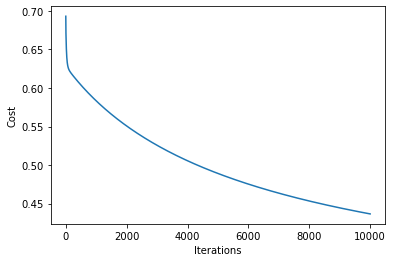

In [24]:
#Plot J vs iterations
itr=range(1,10001)
plt.plot(itr,cost)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.show()

In [25]:
#Using our trained model to predict target variable
def predict(w,c,X):
    pred=hypothesis(X,w,c)
    pred=(pred>0.5)*1
    return pred

In [26]:
#accuracy of model
def accuracy(y_hat,y):
    return 100 - (np.mean(np.abs(y_hat - y)) * 100)

In [27]:

predict_train=predict(W,c,X_train_un)
predict_test=predict(W,c,X_test.T)


In [28]:
#Accuracy of model without finetuning
print("Train:",accuracy(predict_train,Y_train))
print("Test:",accuracy(predict_test,Y_test.T))

Train: 83.51648351648352
Test: 85.08771929824562


In [29]:
#trying scaled data
X_train_normalized = minmax_scale(X_train).T
X_test_normalized=minmax_scale(X_test).T
Wn,cn,costn=log_model_fit(X_train_normalized,Y_train,10000,0.01)

iteration no:  0  and cost: 0.6931471805599453
iteration no:  1000  and cost: 0.6296769011637148
iteration no:  2000  and cost: 0.5824729735031986
iteration no:  3000  and cost: 0.5459375137149001
iteration no:  4000  and cost: 0.5170378663199882
iteration no:  5000  and cost: 0.49368012629341884
iteration no:  6000  and cost: 0.474423359411569
iteration no:  7000  and cost: 0.4582644891056645
iteration no:  8000  and cost: 0.44449276191956216
iteration no:  9000  and cost: 0.4325946053050096
iteration no:  10000  and cost: 0.4222014110014349


In [30]:
predict_train_n=predict(Wn,cn,X_train_normalized)
predict_test_n=predict(Wn,cn,X_test_normalized)


In [31]:
print("Train:",accuracy(predict_train_n,Y_train))
print("Test:",accuracy(predict_test_n,Y_test.T))

Train: 86.5934065934066
Test: 85.96491228070175


In [32]:
#Hyperparameter tuning

alpha=[0.02,0.01,0.008,0.005,0.001]
costs=np.zeros((len(alpha),20000))
weights=np.zeros((20,len(alpha)))
constants=[]
for x in range(len(alpha)):
    print("\n\n--------------------------------ALPHA=",alpha[x],"------------------------\n\n")
    weight,constant,cost=log_model_fit(X_train_un,Y_train,20000,alpha[x],verbose=0)
    weights[:,x]=weight[:,0]
    constants.append(constant)
    costs[x,:]=cost
    
    
    
    



--------------------------------ALPHA= 0.02 ------------------------


iteration no:  20000  and cost: 0.3473438935118067


--------------------------------ALPHA= 0.01 ------------------------


iteration no:  20000  and cost: 0.38865485507311215


--------------------------------ALPHA= 0.008 ------------------------


iteration no:  20000  and cost: 0.40329910007709513


--------------------------------ALPHA= 0.005 ------------------------


iteration no:  20000  and cost: 0.43663786827603657


--------------------------------ALPHA= 0.001 ------------------------


iteration no:  20000  and cost: 0.5507319500233914


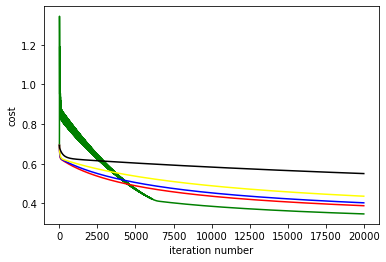

In [33]:
#Plotting for visualisation
itr=range(1,20000+1)
colors=['green','red','blue','yellow','black']

for i in range(len(colors)):
    costed=costs[i,:]
    plt.plot(itr,costed,color=colors[i])

plt.ylabel("cost")
plt.xlabel('iteration number')
plt.show()

In [34]:
#Final model with normalised data and alpha=0.02 and number of iterations=20000
W_final,c_final,cost_final=log_model_fit(X_train_normalized,Y_train,20000,0.02,verbose=0)

iteration no:  20000  and cost: 0.3094822032096988


In [35]:
predict_train_final=predict(W_final,c_final,X_train_normalized)
predict_test_final=predict(W_final,c_final,X_test_normalized)

In [36]:
#final accuracy after tuning 
print("Train:",accuracy(predict_train_final,Y_train))
print("Test:",accuracy(predict_test_final,Y_test.T))

Train: 88.79120879120879
Test: 87.71929824561404
